<a href="https://colab.research.google.com/github/simsekergun/Resolution/blob/main/ResolutionFCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import metrics 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
# Multilayer Perceptron
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import concatenate
from tensorflow.keras import optimizers
from tensorflow.keras import backend
from keras.layers import LeakyReLU, PReLU
from tensorflow.keras.metrics import categorical_accuracy

In [3]:
df_m = pd.read_csv('https://raw.githubusercontent.com/simsekergun/Resolution/main/Es_measured.csv',header=None)
df_r = pd.read_csv('https://raw.githubusercontent.com/simsekergun/Resolution/main/Es_real.csv',header=None)
df_m.shape, df_r.shape

((2330, 110), (2330, 100))

In [4]:
X = df_m
y = df_r

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=5)
X_train.shape, X_test.shape, y_train.shape

((2097, 110), (233, 110), (2097, 100))

In [6]:
# Let us some functions to normalize, de-normalize, and to calculate errors
def normx(x):
  return (x - train_statsX['mean']) / train_statsX['std']
def norm(y):
  return (y - train_statsY['mean']) / train_statsY['std']
def denorm(y):
  return (y* train_statsY['std'] + train_statsY['mean'])  
def mean_aep(u1,u2):  
  return (round(100*(100*sum(abs((u2-u1)/u1))/len(u1)))/100)
def max_aep(u1,u2):  
  return (round(100*(100*max(abs((u2-u1)/u1))))/100)  

In [7]:
train_statsY = y_train.describe().transpose()
train_statsX = X_train.describe().transpose()
XX = normx(X_train)
YY = norm(y_train)
xx = normx(X_test)
yy = norm(y_test)

In [8]:
# ANN parameters
ac = 'relu'  # activation function
nnno = 1024    # number of neurons
dr_rate = 0.2  # dropout rate
EPOCHS = 200    # number of epocs
LR = 0.001     # learning rate

In [9]:
visible = Input(shape=(110,))
hidden1 = Dense(nnno, activation=ac)(visible)
hidden1 = Dropout(dr_rate)(hidden1)
hidden2 = Dense(nnno, activation=ac)(hidden1)
hidden2 = Dropout(dr_rate)(hidden2)
hidden3 = Dense(nnno, activation=ac)(hidden2)
hidden3 = Dropout(dr_rate)(hidden3)
predicted_value = Dense(100, activation=ac)(hidden3)
modelANN = Model(inputs=visible, outputs=predicted_value)

In [10]:
opt = optimizers.Adamax(learning_rate=LR)
modelANN.compile(optimizer=opt, loss=['mse'])
history = modelANN.fit(XX, YY,epochs=EPOCHS, validation_data = (xx,yy), verbose=1)

Epoch 1/200
66/66 [==============================] - 11s 9ms/step - loss: 0.9027 - val_loss: 1.1351
Epoch 2/200
66/66 [==============================] - 0s 4ms/step - loss: 0.8607 - val_loss: 1.1226
Epoch 3/200
66/66 [==============================] - 0s 4ms/step - loss: 0.8497 - val_loss: 1.1086
Epoch 4/200
66/66 [==============================] - 0s 4ms/step - loss: 0.8386 - val_loss: 1.1035
Epoch 5/200
66/66 [==============================] - 0s 4ms/step - loss: 0.8266 - val_loss: 1.0747
Epoch 6/200
66/66 [==============================] - 0s 4ms/step - loss: 0.8145 - val_loss: 1.0657
Epoch 7/200
66/66 [==============================] - 0s 4ms/step - loss: 0.8115 - val_loss: 1.0713
Epoch 8/200
66/66 [==============================] - 0s 4ms/step - loss: 0.8068 - val_loss: 1.0695
Epoch 9/200
66/66 [==============================] - 0s 4ms/step - loss: 0.8093 - val_loss: 1.0596
Epoch 10/200
66/66 [==============================] - 0s 4ms/step - loss: 0.8043 - val_loss: 1.0591
Epoch 11

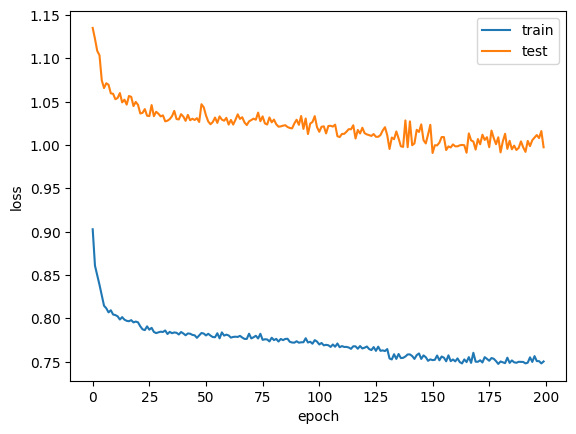

In [11]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [12]:
test_predictions = modelANN.predict(xx)

8/8 [==============================] - 0s 2ms/step


In [13]:
tp = pd.DataFrame(test_predictions)
tp2 = denorm(tp)

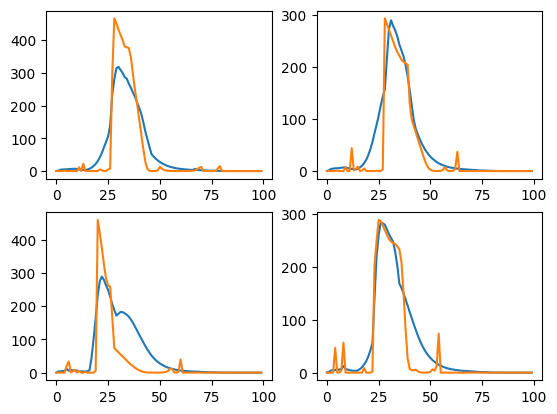

In [14]:
# Plot some results: truth vs prediction
ntest1 = 0 
ntest2 = 100 
ntest3 = 20
ntest4 = 40 
fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(tp2.iloc[ntest1,:])
axs[0, 0].plot(y_test.iloc[ntest1,:])
axs[0, 1].plot(tp2.iloc[ntest2,:])
axs[0, 1].plot(y_test.iloc[ntest2,:])
axs[1, 0].plot(tp2.iloc[ntest3,:])
axs[1, 0].plot(y_test.iloc[ntest3,:])
axs[1, 1].plot(tp2.iloc[ntest4,:])
axs[1, 1].plot(y_test.iloc[ntest4,:])


In [18]:
errors = np.zeros(100)
for i in np.arange(100):
  errors[i]=mean_squared_error(tp2.iloc[i,:],y_test.iloc[i,:])/y_test.iloc[i,:].max()
errors.mean()  

5.398042267459663

In [16]:
from google.colab import files
X_test.to_csv('FCNN_Xtest.csv')
y_test.to_csv('FCNN_ytest.csv')
tp2.to_csv('FCNN_ypred.csv')
files.download('FCNN_Xtest.csv')
files.download('FCNN_ytest.csv')
files.download('FCNN_ypred.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>